# 아이디어
## 시각화 아이디어
 * 해외 vs 국내  
 
## adtype
 * adtype 1번이고  autoad로 분류. 컨버전 양(countplot), 컨버전 비율(barplot)  
 * adtype 2번이고  totalref or autoad2로 분류. 컨버전 양(countplot), 컨버전 비율(barplot)  
 * 컨버전 총량과 비율을 데이터 프레임에 저장 혹은 리스트에 저장
 * 검색어 - enc_refparam 에서 한글(스페이스바 포함) 추출 이후 새로운 컬럼(search_name)에 저장
 * 검색어 별 컨버전 발생 총량, 비율. (x=adtype, y=conversion_no, hue= search_name).
 * 

In [1]:
import pymysql

In [2]:
conn = pymysql.connect(host = 'localhost',user='bigdb',password='bigdb1234', \
                      db='weblog',charset='utf8')

In [3]:
cur = conn.cursor(pymysql.cursors.DictCursor)

In [4]:
sql = "select * from url" 
cur.execute(sql)
result = cur.fetchall()

In [5]:
cur.close()
conn.close()

In [6]:
import pandas as pd
df_row = pd.DataFrame(result)

## 나라 분류(한국=1, 외국=2) country_no

In [7]:
df = df_row.copy()

In [8]:
df['country'].value_counts()

Korea, Republic of        1130370
United States               17959
China                        7875
Japan                        4220
Canada                       1628
                           ...   
Palau                           1
Bosnia and Herzegovina          1
Iceland                         1
Luxembourg                      1
Libyan Arab Jamahiriya          1
Name: country, Length: 129, dtype: int64

In [8]:
df['country'] = df['country'].fillna('other')

In [9]:
# 0은 없는값
df['country'].isnull().sum()

0

In [10]:
def coun_change(data):
    if data=='Korea, Republic of':
        return 1
    else:
        return 0

In [11]:
df['country_no'] = df['country'].apply(coun_change)

In [12]:
df['country_no'].value_counts()

1    1130370
0      92091
Name: country_no, dtype: int64

## 컨버젼 1처리 conversion_no

In [13]:
def change(data):
    if data==0:
        return 0
    else:
        return 1

In [14]:
df['conversion_no'] = df['conversion'].apply(change)

In [15]:
df['conversion_no'].value_counts()

0    1213528
1       8933
Name: conversion_no, dtype: int64

### 컨버전 총량과 비율을 데이터 프레임에 저장 혹은 리스트에 저장
### 검색어 - enc_refparam 에서 한글(스페이스바 포함) 추출 이후 새로운 컬럼(search_name)에 저장

In [18]:
df['search_name'] = df['enc_refparam'].str.replace('[^가-힣 ]','')

### conversion = 1 df : 1, conversion = 0 : df0

In [19]:
df_cv1 = df[df['conversion_no']==1]
df_cv0 = df[df['conversion_no']==0]

### adtype 1번이고 autoad로 분류. 컨버전 양(countplot), 컨버전 비율(barplot)

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np### 컨버전 총량과 비율을 데이터 프레임에 저장 혹은 리스트에 저장
### 검색어 - enc_refparam 에서 한글(스페이스바 포함) 추출 이후 새로운 컬럼(search_name)에 저장

df['search_name'] = df['enc_refparam'].str.replace('[^가-힣 ]','')
import seaborn as sns

# 한글처리
from matplotlib import font_manager, rc
font_ = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_)

In [21]:
# adtype 1 찾기
df_ad1 = df[df['adtype']==1]

In [24]:
df_cv_ad1 = df_cv1[df_cv1['adtype']==1]

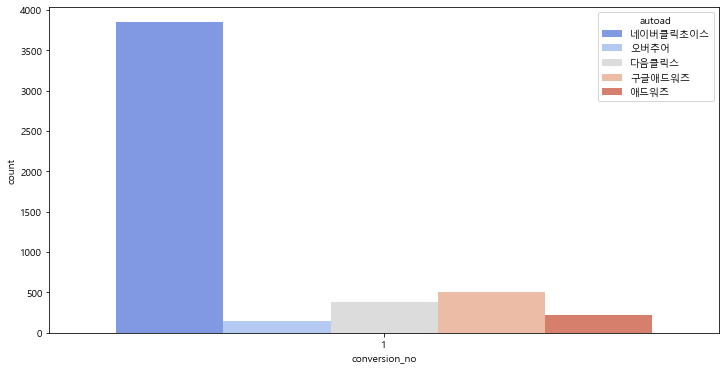

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x='conversion_no',data=df_cv_ad1, hue='autoad', palette='coolwarm')
plt.show()

### adtype 2번이고 totalref로 분류. 컨버전 양(countplot), 컨버전 비율(barplot)

In [22]:
df_ad2 = df[df['adtype']==2]

In [23]:
df_cv_ad2 = df_cv1[df_cv1['adtype']==2]

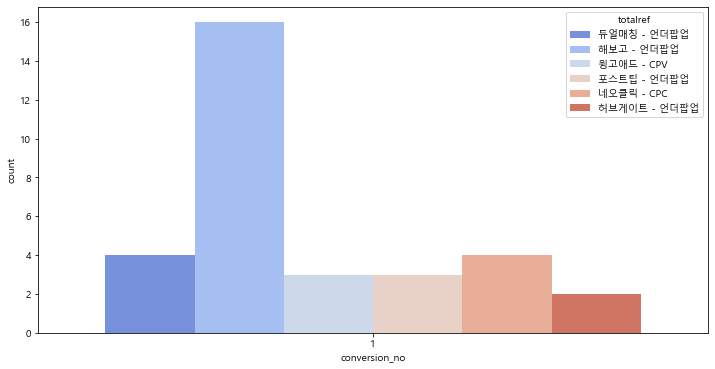

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x='conversion_no',data=df_cv_ad2, hue='totalref', palette='coolwarm')
plt.show()

### 검색어 별 컨버전 발생 총량, 비율. (x=adtype, y=conversion_no, hue= search_name).

### adtype별 search_name이 많은 순으로 확인

In [20]:
df_ad3 = df[df['adtype']==3]

### adtype별 top 20 추출

In [48]:
value1 = df_ad1[(df_ad1['search_name']!='')&(df_ad1['search_name']!=' ')]['search_name'].value_counts().head(20)

In [60]:
value1

홈페이지제작        12503
웹에이전시          8835
홈페이지 제작        5065
홈페이지제작업체       3313
리뉴얼            2781
홈페이지제작비용       2467
모바일홈페이지        2380
홈페이지 디자인       2200
기업홈페이지제작       2101
홈페이지제작문의       2088
홈페이지디자인        1911
기업홈페이지         1887
웹싸이트           1838
웹디자인           1630
사이트제작          1493
모바일 홈페이지       1410
홈페이지제작홈페이지     1290
모바일웹           1268
랜딩페이지          1066
웹에이젼시          1029
Name: search_name, dtype: int64

In [50]:
value2 = df_ad2[(df_ad2['search_name']!='')&(df_ad2['search_name']!=' ')]['search_name'].value_counts().head(20)

In [52]:
value3 = df_ad3[(df_ad3['search_name']!='')&(df_ad3['search_name']!=' ')]['search_name'].value_counts().head(20)

### adtype별로 search_name이  top 20 새로운 데이터 프레임으로

In [33]:
import pandas as pd

In [120]:
df_ad1[(df_ad1['search_name']!='')&(df_ad1['search_name']!=' ')]['search_name']\
.value_counts().head(20)

홈페이지제작        12503
웹에이전시          8835
홈페이지 제작        5065
홈페이지제작업체       3313
리뉴얼            2781
홈페이지제작비용       2467
모바일홈페이지        2380
홈페이지 디자인       2200
기업홈페이지제작       2101
홈페이지제작문의       2088
홈페이지디자인        1911
기업홈페이지         1887
웹싸이트           1838
웹디자인           1630
사이트제작          1493
모바일 홈페이지       1410
홈페이지제작홈페이지     1290
모바일웹           1268
랜딩페이지          1066
웹에이젼시          1029
Name: search_name, dtype: int64

In [111]:
df_ad2[(df_ad2['search_name']!='')&(df_ad2['search_name']!=' ')]['search_name']\
.value_counts().head(20)

홈페이지제작       27299
모바일홈페이지제작     8306
웹디자인회사        7968
웹에이전시         7815
홈페이지제작비용      7359
홈페이지제작업체      6417
사이트제작         4890
기업홈페이지        4809
기업홈페이지디자인     4282
유명웹에이전시       4160
홈페이지만들기       3434
웹디자인          3249
웹사이트          3045
구인구직사이트제작     2617
홈페이지디자인       2126
팝업창디자인        2114
신문사이트제작       1825
홈페이지관리        1630
사이트만들기        1305
변호사홈페이지       1241
Name: search_name, dtype: int64

In [112]:
df_ad3[(df_ad3['search_name']!='')&(df_ad3['search_name']!=' ')]['search_name']\
.value_counts().head(20)

비젠소프트        25310
비젠            2489
랜딩페이지         1958
웹에이전시         1888
홈페이지제작        1701
배너제작          1422
모바일홈페이지       1371
비젠소프트비젠       1182
반응형웹          1177
반응형 홈페이지      1008
비젠소프트비젠소       978
홈페이지제작업체       890
반응형홈페이지        836
모바일 홈페이지       832
홈페이지 제작        812
반응형 웹          698
모바일웹           677
비젠비젠소프트        666
모바일홈페이지제작      621
비젠소비젠소프트       551
Name: search_name, dtype: int64

In [36]:
ad1_value20 = pd.DataFrame()
for i in range(0,len(value1.index)):
    a = df_ad1[df_ad1['search_name']==value1.index[i]]
    ad1_value20 = pd.concat([ad1_value20,a])

In [42]:
# adtype:1, conversion:둘다, search_name:top20
ad1_value20[ad1_value20['search_name']=='홈페이지디자인']

,no,sitenum,sessionid,connectid,curdate,ip,refhost,refpage,refparam,enc_refparam,...,motiveadtype,motiveautoad2,useragent,colors,pcookie,jscript,jsversion,country_no,conversion_no,search_name
190,207,1,1333611699765,1333611699765,2012-04-05 16:41:37,58.231.251.212,search.naver.com,/search.naver,where=nexearch&query=%ED%99%88%ED%8E%98%EC%9D%...,where=nexearch&query=홈페이지디자인&ie=utf8&sm=tab_sh...,...,NaN,None,None,None,None,None,None,1,0,홈페이지디자인
262,285,1,1333616453473,1333616453473,2012-04-05 18:00:45,116.41.82.72,search.naver.com,/search.naver,sm=tab_hty.top&where=nexearch&ie=utf8&query=%E...,sm=tab_hty.top&where=nexearch&ie=utf8&query=홈페...,...,NaN,None,None,None,None,None,None,1,0,홈페이지디자인
384,418,1,1333670061858,1333670061858,2012-04-06 08:54:20,76.79.91.11,search.naver.com,/search.naver,where=nexearch&query=%ED%99%88%ED%8E%98%EC%9D%...,where=nexearch&query=홈페이지디자인&ie=utf8&sm=tab_rb...,...,NaN,None,None,None,None,None,None,0,0,홈페이지디자인
424,458,1,1333674278487,1333674278487,2012-04-06 10:04:37,175.211.94.18,itmobilelife.com,/news/search_result.html,search=%ED%99%88%ED%8E%98%EC%9D%B4%EC%A7%80%EB...,search=홈페이지디자인&domain=itmobilelife.com&stype=i...,...,NaN,None,None,None,None,None,None,1,0,홈페이지디자인
561,616,1,1333691028078,1333691028078,2012-04-06 14:43:44,115.94.189.178,itmobilelife.com,/news/search_result.html,search=%ED%99%88%ED%8E%98%EC%9D%B4%EC%A7%80%EB...,search=홈페이지디자인&domain=itmobilelife.com&stype=i...,...,NaN,None,None,None,None,None,None,1,0,홈페이지디자인
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216984,1540609,1,1591575248330,1591575248330,2020-06-08 09:14:07,39.118.85.57,www.google.co.kr,/,campaignid=145133793&adgroupid=16728570033&key...,campaignid=145133793&adgroupid=16728570033&key...,...,NaN,None,Mozilla/5.0(WindowsNT10.0;Win64;x64)AppleWebKi...,24,사용가능,사용불가능,1.7,0,0,홈페이지디자인
1217140,1540765,1,1591594745024,1591594745024,2020-06-08 14:39:02,58.225.59.196,www.google.co.kr,/,campaignid=145133793&adgroupid=16728570033&key...,campaignid=145133793&adgroupid=16728570033&key...,...,NaN,None,Mozilla/5.0(Macintosh;IntelMacOSX10_10_5)Apple...,24,사용가능,사용가능,1.7,1,0,홈페이지디자인
1217543,1541168,1,1591687712100,1591687712100,2020-06-09 16:28:29,49.172.153.32,ad.search.naver.com,/search.naver,where=ad&query=%ED%99%88%ED%8E%98%EC%9D%B4%EC%...,where=ad&query=홈페이지디자인&referenceId=UW8HJwp0Yid...,...,NaN,None,Mozilla/5.0(WindowsNT10.0;WOW64;Trident/7.0;.N...,24,사용가능,사용가능,1.3,1,0,홈페이지디자인
1220742,1544367,1,1592806321318,1592806321318,2020-06-22 15:12:00,223.38.22.53,www.google.com,/,campaignid=145133793&adgroupid=16728570033&key...,campaignid=145133793&adgroupid=16728570033&key...,...,NaN,None,Mozilla/5.0(Macintosh;IntelMacOSX10_15_1)Apple...,30,사용가능,사용불가능,1.7,1,0,홈페이지디자인


In [53]:
ad2_value20 = pd.DataFrame()
for i in range(0,len(value2.index)):
    a = df_ad2[df_ad2['search_name']==value2.index[i]]
    ad2_value20 = pd.concat([ad2_value20,a])

In [56]:
# adtype:2, conversion:둘다, search_name:top20
ad2_value20

,no,sitenum,sessionid,connectid,curdate,ip,refhost,refpage,refparam,enc_refparam,...,motiveadtype,motiveautoad2,useragent,colors,pcookie,jscript,jsversion,country_no,conversion_no,search_name
619498,700904,1,1387411056078,1387411056078,2013-12-19 08:57:37,58.151.49.164,www.xxsoft.com,/,vizenlogcd=10000388&vizentype=searchad&vizenco...,vizenlogcd=10000388&vizentype=searchad&vizenco...,...,NaN,None,None,None,None,None,None,1,0,홈페이지제작
619506,700913,1,1387411244312,1387411244312,2013-12-19 09:00:40,58.149.49.235,www.xxsoft.com,/,vizenlogcd=10000388&vizentype=searchad&vizenco...,vizenlogcd=10000388&vizentype=searchad&vizenco...,...,NaN,None,None,None,None,None,None,1,0,홈페이지제작
619514,700921,1,1387411316859,1387411316859,2013-12-19 09:01:56,116.39.144.126,www.xxsoft.com,/,vizenlogcd=10000388&vizentype=searchad&vizenco...,vizenlogcd=10000388&vizentype=searchad&vizenco...,...,NaN,None,None,None,None,None,None,1,0,홈페이지제작
619523,700930,1,1387411489998,1387411489998,2013-12-19 09:04:40,182.228.137.13,www.xxsoft.com,/,vizenlogcd=10000388&vizentype=searchad&vizenco...,vizenlogcd=10000388&vizentype=searchad&vizenco...,...,NaN,None,None,None,None,None,None,1,0,홈페이지제작
619526,700933,1,1387411514925,1387411514925,2013-12-19 09:05:12,112.170.135.201,www.xxsoft.com,/,vizenlogcd=10000388&vizentype=searchad&vizenco...,vizenlogcd=10000388&vizentype=searchad&vizenco...,...,NaN,None,None,None,None,None,None,1,0,홈페이지제작
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820610,932301,1,1400311246168,1401110540458,2014-05-26 22:21:05,58.231.74.145,www.xxsoft.com,/,vizenlogcd=10000387&vizentype=searchad&vizenco...,vizenlogcd=10000387&vizentype=searchad&vizenco...,...,NaN,None,None,None,None,None,None,1,0,변호사홈페이지
826835,939782,1,1404356930187,1404356930187,2014-07-03 12:08:48,182.219.78.211,www.xxsoft.com,/,vizenlogcd=10000391&vizentype=searchad&vizenco...,vizenlogcd=10000391&vizentype=searchad&vizenco...,...,NaN,None,None,None,None,None,None,1,0,변호사홈페이지
852296,970417,1,1414233332279,1414233332279,2014-10-25 19:35:20,59.20.86.209,www.xxsoft.com,/,vizenlogcd=10000413&vizentype=searchad&vizenco...,vizenlogcd=10000413&vizentype=searchad&vizenco...,...,NaN,None,None,None,None,None,None,1,0,변호사홈페이지
852300,970421,1,1414233332279,1414233882908,2014-10-25 19:44:30,59.20.86.209,www.xxsoft.com,/,vizenlogcd=10000413&vizentype=searchad&vizenco...,vizenlogcd=10000413&vizentype=searchad&vizenco...,...,NaN,None,None,None,None,None,None,1,0,변호사홈페이지


In [58]:
ad3_value20 = pd.DataFrame()
for i in range(0,len(value3.index)):
    a = df_ad3[df_ad3['search_name']==value3.index[i]]
    ad3_value20 = pd.concat([ad3_value20,a])

In [59]:
# adtype:3, conversion:둘다, search_name:top20
ad3_value20

,no,sitenum,sessionid,connectid,curdate,ip,refhost,refpage,refparam,enc_refparam,...,motiveadtype,motiveautoad2,useragent,colors,pcookie,jscript,jsversion,country_no,conversion_no,search_name
61,71,1,1333440897203,1333600896750,2012-04-05 13:41:28,147.46.235.15,search.naver.com,/search.naver,where=nexearch&query=%EB%B9%84%EC%A0%A0%EC%86%...,where=nexearch&query=비젠소프트&sm=top_hty&fbm=1&ie...,...,NaN,None,None,None,None,None,None,1,0,비젠소프트
88,98,1,1333602594312,1333602594312,2012-04-05 14:09:46,112.187.232.207,search.daum.net,/search,w=tot&t__nil_searchbox=suggest&sug=&q=%BA%F1%C...,w=tot&t__nil_searchbox=suggest&sug=&q=비젠소프트,...,NaN,None,None,None,None,None,None,1,0,비젠소프트
91,101,1,1333602594312,1333602711658,2012-04-05 14:11:43,112.187.232.207,search.naver.com,/search.naver,where=nexearch&query=%EB%B9%84%EC%A0%A0%EC%86%...,where=nexearch&query=비젠소프트&sm=top_hty&fbm=1&ie...,...,NaN,None,None,None,None,None,None,1,0,비젠소프트
168,183,1,1333340549136,1333609786896,2012-04-05 16:09:35,115.93.135.27,search.naver.com,/search.naver,where=nexearch&query=%EB%B9%84%EC%A0%A0%EC%86%...,where=nexearch&query=비젠소프트&sm=top_hty&fbm=0&ie...,...,NaN,None,None,None,None,None,None,1,0,비젠소프트
193,210,1,1333611964536,1333611964536,2012-04-05 16:45:59,211.246.78.237,search.naver.com,/search.naver,where=nexearch&query=%EB%B9%84%EC%A0%A0%EC%86%...,where=nexearch&query=비젠소프트&sm=top_hty&fbm=1&ie...,...,NaN,None,None,None,None,None,None,1,0,비젠소프트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188800,1512425,1,1580823913827,1580823913827,2020-02-04 22:45:14,125.188.250.224,search.naver.com,/search.naver,sm=top_sug.pre&fbm=1&acr=1&acq=%EB%B9%84%EC%A0...,sm=top_sug.pre&fbm=1&acr=1&acq=비젠소&qdt=0&ie=ut...,...,NaN,None,Mozilla/5.0(WindowsNT6.3;Win64;x64)AppleWebKit...,24,사용가능,사용불가능,1.7,1,0,비젠소비젠소프트
1188861,1512486,1,1580869128737,1580869128737,2020-02-05 11:18:49,106.245.174.103,search.naver.com,/search.naver,sm=top_sug.pre&fbm=1&acr=1&acq=%EB%B9%84%EC%A0...,sm=top_sug.pre&fbm=1&acr=1&acq=비젠소&qdt=0&ie=ut...,...,NaN,None,Mozilla/5.0(WindowsNT10.0;Win64;x64)AppleWebKi...,24,사용가능,사용불가능,1.7,0,0,비젠소비젠소프트
1204620,1528245,1,1586324337123,1586332716364,2020-04-08 16:58:36,118.36.251.1,search.naver.com,/search.naver,sm=top_sug.pre&fbm=1&acr=1&acq=%EB%B9%84%EC%A0...,sm=top_sug.pre&fbm=1&acr=1&acq=비젠소&qdt=0&ie=ut...,...,NaN,None,Mozilla/5.0(WindowsNT10.0;WOW64;Trident/7.0;.N...,24,사용가능,사용가능,1.3,1,0,비젠소비젠소프트
1205067,1528692,1,1586480966243,1586480966243,2020-04-10 10:09:30,175.212.214.69,search.naver.com,/search.naver,sm=top_sug.pre&fbm=0&acr=1&acq=%EB%B9%84%EC%A0...,sm=top_sug.pre&fbm=0&acr=1&acq=비젠소&qdt=0&ie=ut...,...,NaN,None,Mozilla/5.0(WindowsNT10.0;WOW64;Trident/7.0;.N...,24,사용가능,사용가능,1.3,1,0,비젠소비젠소프트


## conversion : 0,1 둘다 확인

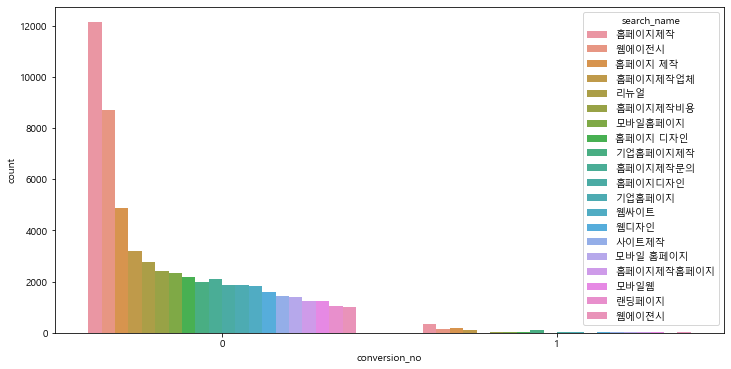

In [69]:
plt.figure(figsize=(12,6))
sns.countplot(x='conversion_no', data=ad1_value20, hue='search_name')
plt.show()

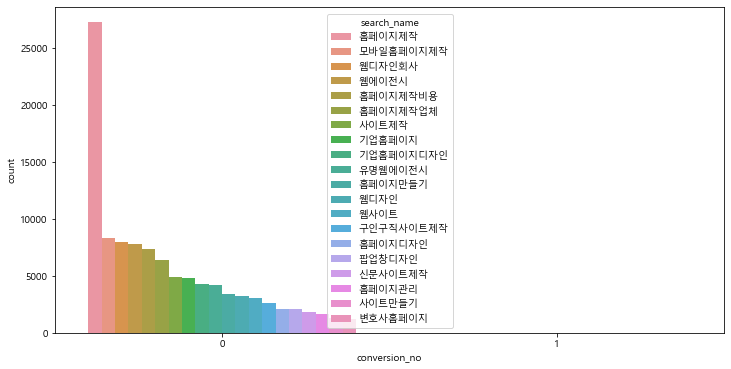

In [65]:
plt.figure(figsize=(12,6))
sns.countplot(x='conversion_no', data=ad2_value20, hue='search_name')
plt.show()

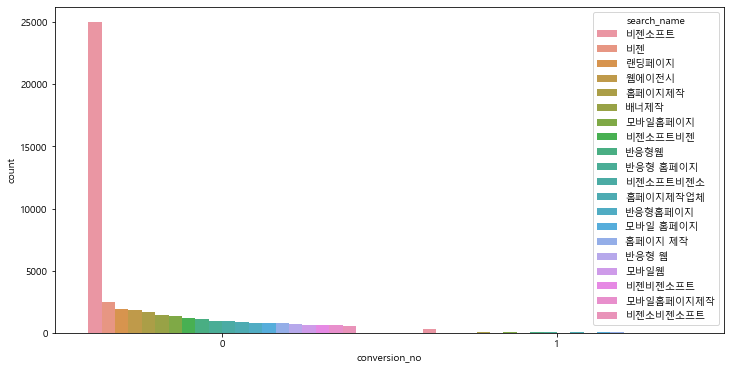

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(x='conversion_no', data=ad3_value20, hue='search_name')
plt.show()

## conversion이 1인 경우에 대해서만 확인

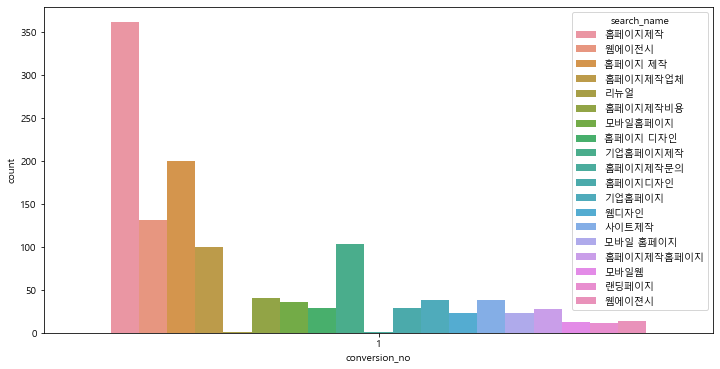

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(x='conversion_no', data=ad1_value20[ad1_value20['conversion_no']==1],
              hue='search_name' )

plt.show()

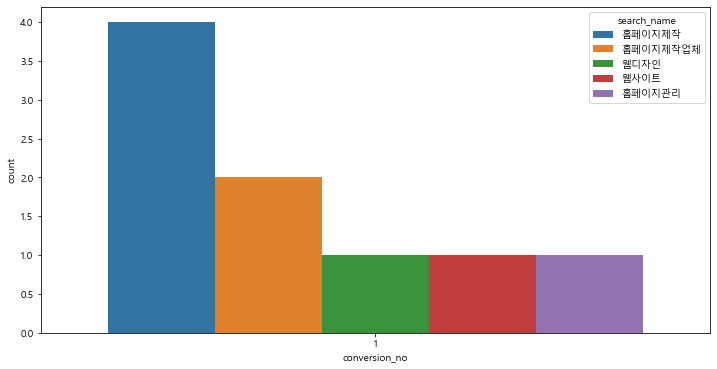

In [71]:
# adtype:2  search_name:top20으로 설정하면 conversion이 발생하지 않았을때 순위들이
# 많이 나오기 때문에 이런 결과가 나옴
plt.figure(figsize=(12,6))
sns.countplot(x='conversion_no', data=ad2_value20[ad2_value20['conversion_no']==1], hue='search_name')
plt.show()

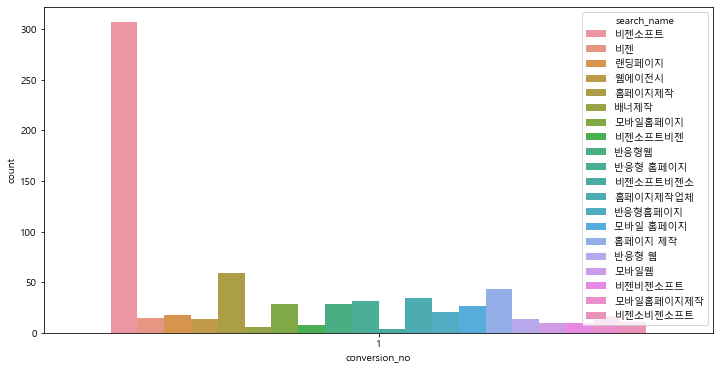

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(x='conversion_no', data=ad3_value20[ad3_value20['conversion_no']==1],
              hue='search_name')
plt.show()

In [74]:
df_ad2[(df_ad2['search_name']!='')&(df_ad2['search_name']!=' ')&(df_ad2['conversion_no']==1)]['search_name']\
.value_counts().head(20)

가구홈페이지제작      5
홈페이지제작        4
홈페이지제작업체      2
웹디자인          1
부산홈피제작        1
웹사이트          1
재단홈페이지제작      1
웹페이지구축        1
쇼핑몰홈페이지제작     1
홈페이지제작업체추천    1
홈페이지관리        1
Name: search_name, dtype: int64

### 비율 계산

In [225]:
def rate_(data):
    a = []
    a.append(data/data[0])
    return a

In [180]:
value_rate1 = list(ad1_value20[ad1_value20['conversion_no']==1]['search_name']\
                   .value_counts().values)

In [226]:
value_rate1

[361, 200, 131, 103, 100, 40, 38, 38, 36, 29, 29, 28, 23, 23, 14, 12, 11, 1, 1]

In [229]:
list(rate_(value_rate1)[0])

[1.0,
 0.554016620498615,
 0.3628808864265928,
 0.2853185595567867,
 0.2770083102493075,
 0.11080332409972299,
 0.10526315789473684,
 0.10526315789473684,
 0.0997229916897507,
 0.08033240997229917,
 0.08033240997229917,
 0.07756232686980609,
 0.06371191135734072,
 0.06371191135734072,
 0.038781163434903045,
 0.0332409972299169,
 0.030470914127423823,
 0.002770083102493075,
 0.002770083102493075,
 1.0,
 0.554016620498615,
 0.3628808864265928,
 0.2853185595567867,
 0.2770083102493075,
 0.11080332409972299,
 0.10526315789473684,
 0.10526315789473684,
 0.0997229916897507,
 0.08033240997229917,
 0.08033240997229917,
 0.07756232686980609,
 0.06371191135734072,
 0.06371191135734072,
 0.038781163434903045,
 0.0332409972299169,
 0.030470914127423823,
 0.002770083102493075,
 0.002770083102493075,
 1.0,
 0.554016620498615,
 0.3628808864265928,
 0.2853185595567867,
 0.2770083102493075,
 0.11080332409972299,
 0.10526315789473684,
 0.10526315789473684,
 0.0997229916897507,
 0.08033240997229917,
 0.0

In [181]:
value_rate2 = list(ad2_value20[ad2_value20['conversion_no']==1]['search_name']\
                   .value_counts().values)

In [232]:
value_rate2

[4, 2, 1, 1, 1]

In [233]:
list(rate_(value_rate2)[0])

[1.0, 0.5, 0.25, 0.25, 0.25]

In [182]:
value_rate3 = list(ad3_value20[ad3_value20['conversion_no']==1]['search_name']\
                   .value_counts().values)

In [234]:
value_rate3

[307, 59, 43, 34, 31, 28, 28, 26, 21, 18, 17, 15, 14, 14, 11, 10, 10, 8, 6, 4]

In [235]:
list(rate_(value_rate3)[0])

[1.0,
 0.19218241042345277,
 0.14006514657980457,
 0.11074918566775244,
 0.10097719869706841,
 0.09120521172638436,
 0.09120521172638436,
 0.08469055374592833,
 0.06840390879478828,
 0.05863192182410423,
 0.05537459283387622,
 0.048859934853420196,
 0.04560260586319218,
 0.04560260586319218,
 0.035830618892508145,
 0.03257328990228013,
 0.03257328990228013,
 0.026058631921824105,
 0.019543973941368076,
 0.013029315960912053]